In [1]:
import pandas as pd

# Загрузить Excel файл
xls = pd.ExcelFile('combined_data.xlsx')

# Если в файле несколько листов, можно выбрать нужный
# Например, первый лист:
df = xls.parse(xls.sheet_names[0])

# Сохранить в CSV
df.to_csv('combined_import.csv', index=False)

In [6]:
import pandas as pd

# Загрузка файла
df = pd.read_csv('combined_import.csv')

# Количество всех записей
total_records = len(df)

# Количество уникальных продуктов
total_products = df['product_name'].nunique()

# Количество уникальных цехов
total_workshops = df['workshop_name'].nunique()

# Общее время производства (сумма по manufacturing_time_hours)
total_production_time = df['manufacturing_time_hours'].sum()

# Общие трудозатраты (сумма по total_labor_hours)
total_labor_hours = df['total_labor_hours'].sum()

# Вывод результатов
print(f"Общее количество записей: {total_records}")
print(f"Всего продуктов: {total_products}")
print(f"Всего цехов: {total_workshops}")
print(f"Общее время производства (часов): {total_production_time}")
print(f"Общие трудозатраты (человек-часов): {total_labor_hours}")

Общее количество записей: 130
Всего продуктов: 20
Всего цехов: 12
Общее время производства (часов): 133.0
Общие трудозатраты (человек-часов): 650.8


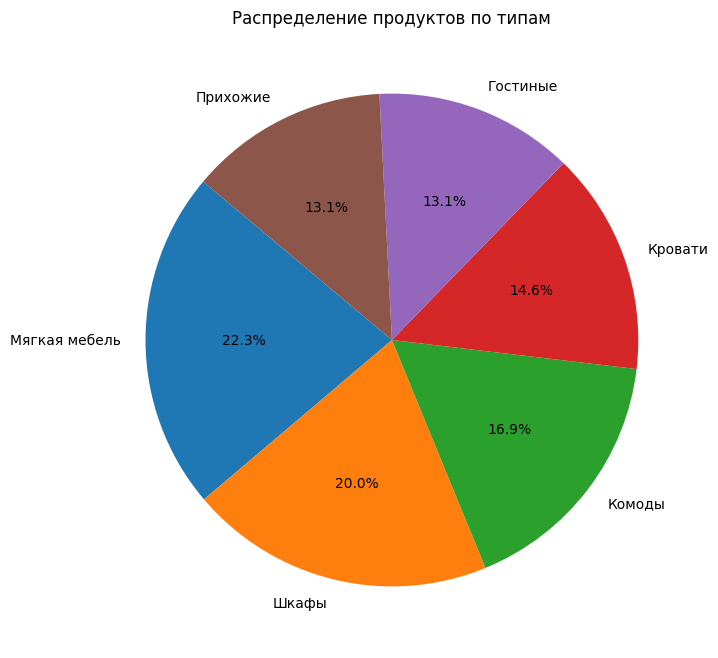

C:\Users\ALFA\AppData\Local\Temp\ipykernel_15440\1923814452.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=product_type_counts.index, y=product_type_counts.values, palette="viridis")


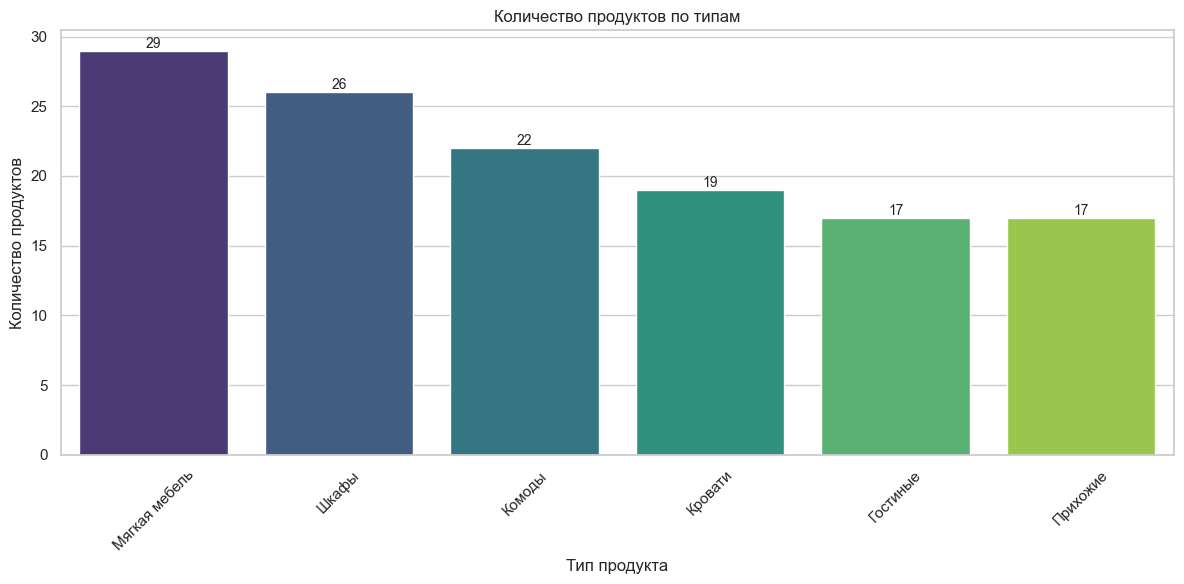

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка файла
df = pd.read_csv('combined_import.csv')

# Распределение продуктов по типам для круговой диаграммы
product_type_counts = df['product_type'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(product_type_counts, labels=product_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение продуктов по типам')
plt.show()

# Настройка стиля для графика
sns.set(style="whitegrid")

# Построение гистограммы с более точной визуализацией
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=product_type_counts.index, y=product_type_counts.values, palette="viridis")
plt.xlabel('Тип продукта')
plt.ylabel('Количество продуктов')
plt.title('Количество продуктов по типам')
plt.xticks(rotation=45)

# Добавление значений сверху столбцов для ясности
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\ALFA\AppData\Local\Temp\ipykernel_15440\3373139392.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='manufacturing_time_hours', y='product_name', data=top_10_products, palette='rocket')


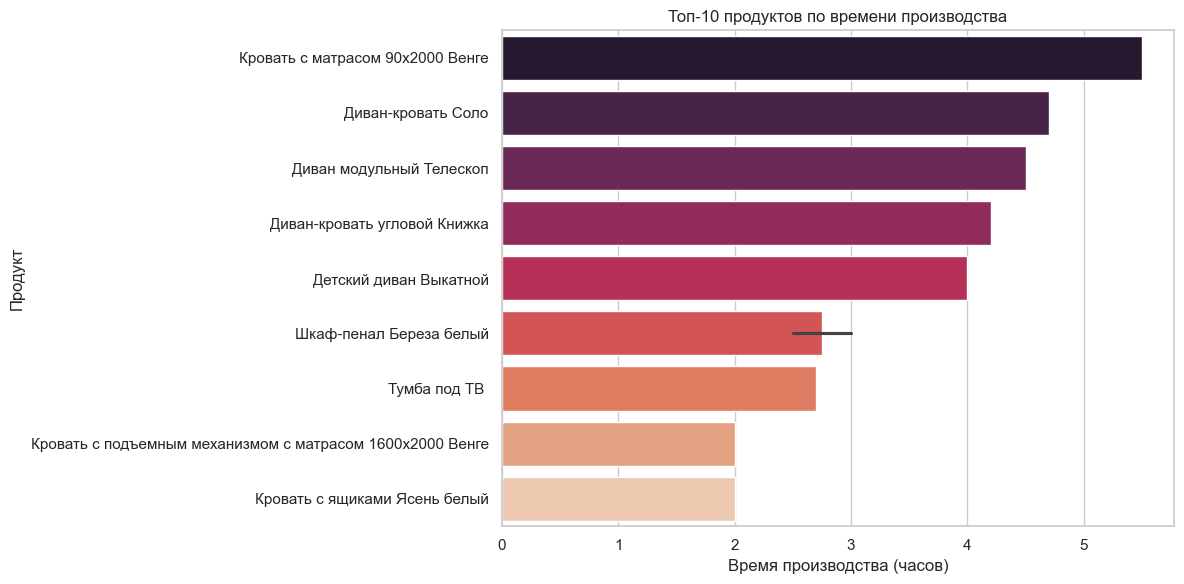

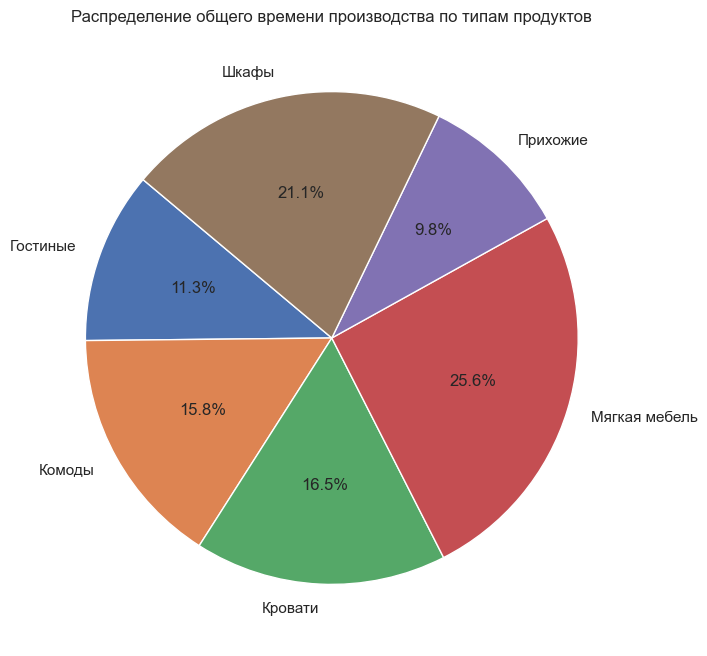

C:\Users\ALFA\AppData\Local\Temp\ipykernel_15440\3373139392.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_type', y='manufacturing_time_hours', data=time_by_type, palette='viridis')


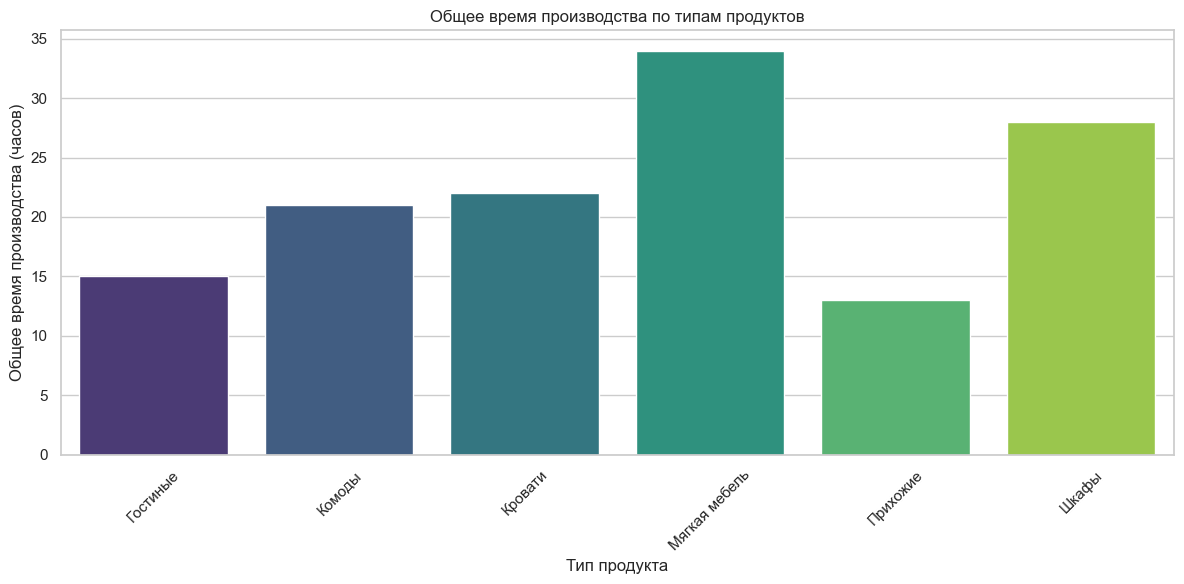

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка файла
df = pd.read_csv('combined_import.csv')

# 1. Топ-10 продуктов по времени производства
top_10_products = df[['product_name', 'manufacturing_time_hours']].sort_values(by='manufacturing_time_hours', ascending=False).head(10)

# Построение барплота топ-10 продуктов
plt.figure(figsize=(12, 6))
sns.barplot(x='manufacturing_time_hours', y='product_name', data=top_10_products, palette='rocket')
plt.xlabel('Время производства (часов)')
plt.ylabel('Продукт')
plt.title('Топ-10 продуктов по времени производства')
plt.tight_layout()
plt.show()

# 2. Распределение времени по типам продуктов
time_by_type = df.groupby('product_type')['manufacturing_time_hours'].sum().reset_index()

# Построение круговой диаграммы распределения времени по типам
plt.figure(figsize=(8, 8))
plt.pie(time_by_type['manufacturing_time_hours'], labels=time_by_type['product_type'], autopct='%1.1f%%', startangle=140)
plt.title('Распределение общего времени производства по типам продуктов')
plt.show()

# Или гистограмма для сравнения по типам
plt.figure(figsize=(12, 6))
sns.barplot(x='product_type', y='manufacturing_time_hours', data=time_by_type, palette='viridis')
plt.xlabel('Тип продукта')
plt.ylabel('Общее время производства (часов)')
plt.title('Общее время производства по типам продуктов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

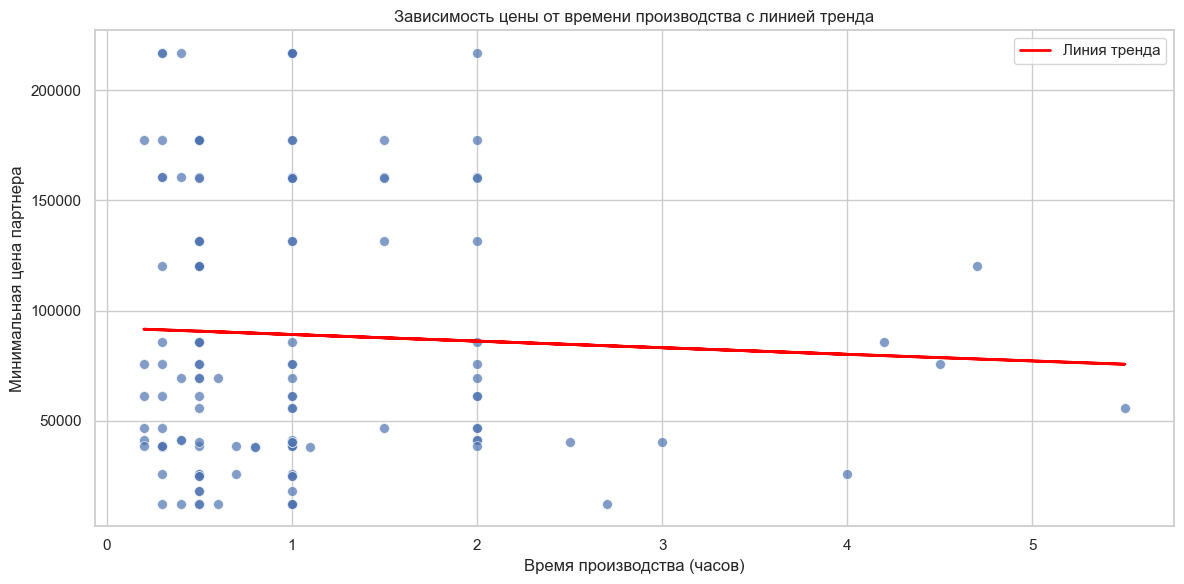

In [15]:
import numpy as np

# Линейная аппроксимация
coeffs = np.polyfit(df['manufacturing_time_hours'], df['minimum_partner_price'], 1)
trendline = np.poly1d(coeffs)

# Построение графика с линией тренда
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='manufacturing_time_hours',
    y='minimum_partner_price',
    data=df,
    alpha=0.7,
    edgecolor='w',
    s=50
)
plt.plot(df['manufacturing_time_hours'], trendline(df['manufacturing_time_hours']), color='red', linewidth=2, label='Линия тренда')
plt.title('Зависимость цены от времени производства с линией тренда')
plt.xlabel('Время производства (часов)')
plt.ylabel('Минимальная цена партнера')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()